
# ASSIGNED Tomato height model



The following data shows the height of a genetically modified tomato plant versus the number of weeks after it was planted outdoors.



In [1]:
import numpy as np
week = np.array([1, 2, 4, 6, 8, 10])
height = np.array([9, 15, 22, 33, 44, 52])

Researchers have suggested that the S-shaped logistic curve:

$height = \frac{k}{1 + e^{a + b week}}$

would be appropriate to represent this data. Use `scipy.optimize.minimize` to find the parameters $k, a, b$ in this equation. Then, use the model to plot how tall the plants will be after 24 weeks.

Discuss whether you think the S-shaped logistic curve is justified for this problem compared to a simple line, and how your prediction of the height in 24 weeks might change if you chose another model.




## solution



First we plot the data:



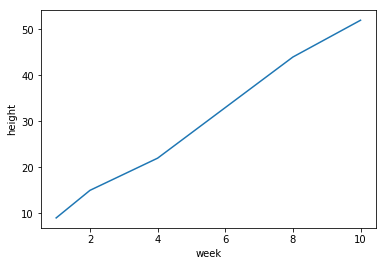

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

week = np.array([1, 2, 4, 6, 8, 10])
height = np.array([9, 15, 22, 33, 44, 52])

plt.plot(week, height)
plt.xlabel('week')
plt.ylabel('height')

At first inspection, it would appear that a linear fit would be appropriate if all we are interested in is this time frame. A line, however, does not reflect the long-term growth of tomato plants; they do not get bigger for all of time.



fun: 3.805541880683797
 hess_inv: array([[  8.26915488e+00,   1.14875473e-02,   5.27698629e-02],
       [  1.14875473e-02,   2.83525953e-03,  -3.42810255e-04],
       [  5.27698629e-02,  -3.42810255e-04,   4.12396575e-04]])
      jac: array([ -2.08616257e-07,  -2.98023224e-08,  -6.25848770e-07])
  message: 'Optimization terminated successfully.'
     nfev: 150
      nit: 21
     njev: 30
   status: 0
  success: True
        x: array([ 64.11025667,   2.01701274,  -0.34805578])
After 24 weeks we expect the plant to be 64.00 units high.

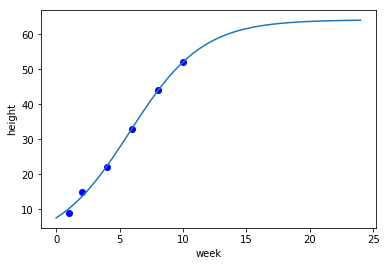

In [1]:
def model(w, pars):
     k, a, b = pars
     return k / (1 + np.exp(a + b * w))

def objective(pars):
    errs = model(week, pars) - height
    return np.sum(errs**2)

from scipy.optimize import minimize
sol = minimize(objective, [51, 3, -0.1])
print(sol)
plt.plot(week, height, 'bo')
wfit = np.linspace(0, 24)
plt.plot(wfit, model(wfit, sol.x))
plt.xlabel('week')
plt.ylabel('height')

print(f'After 24 weeks we expect the plant to be {model(24, sol.x):1.2f} units high.')

The justification of choosing the logistic curve for fitting is based on 1) domain expertise that this function has the behavior of long-term growth of plants; and 2) based on the goal of predicting future behavior based on that model. It is apparent that the logistic function is also approximately linear in the beginning, and only at longer times becomes nonlinear.

